## Trisha Moyer
## Spring 2017

In [7]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
M=nx.read_gml("./polblogs.gml")

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

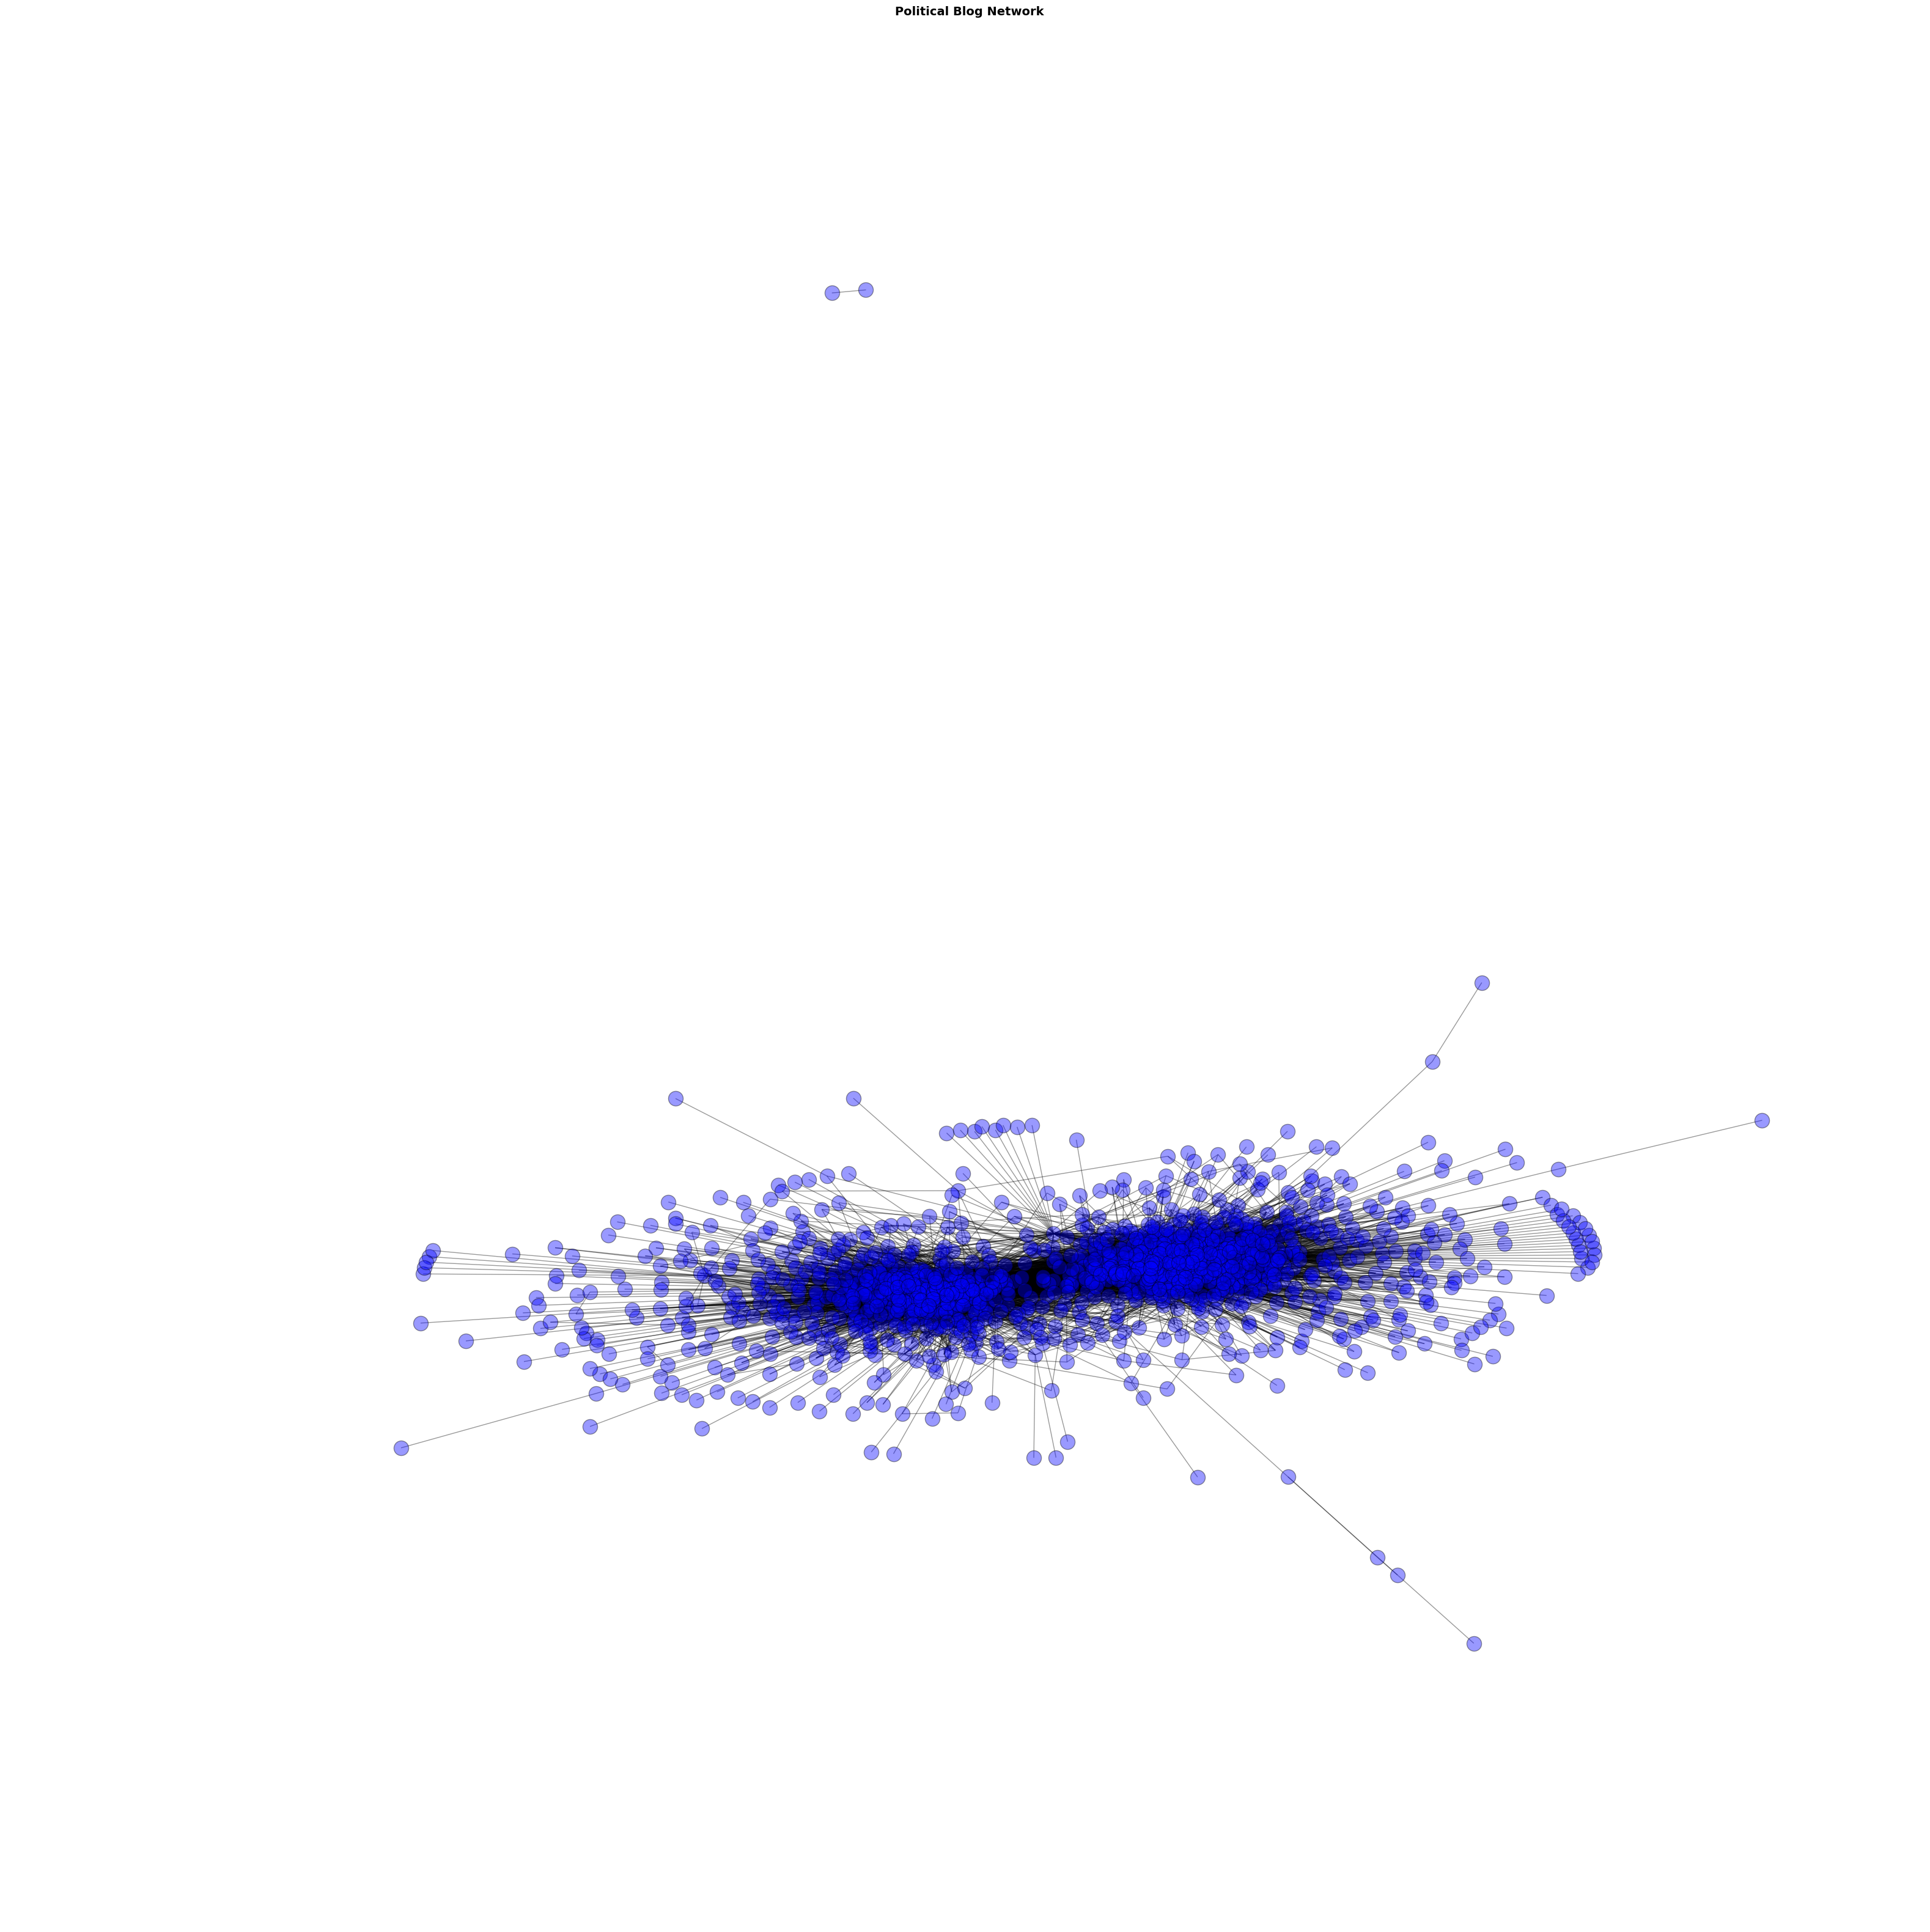

In [17]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
# nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blog Network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [10]:
centrality=nx.eigenvector_centrality(G)

In [11]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

### 2.  What are the 10 most influential blogs?

In [14]:
top_ten = sorted(blog_list, key=lambda x:x[1], reverse = True)
top_ten[:10]

[('atrios.blogspot.com', 0.19480797936637695),
 ('dailykos.com', 0.16089740205234823),
 ('washingtonmonthly.com', 0.14653924259836867),
 ('digbysblog.blogspot.com', 0.14264369221718307),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.13952371571107858),
 ('tbogg.blogspot.com', 0.13703641699824248),
 ('corrente.blogspot.com', 0.12941759274096146),
 ('talkingpointsmemo.com', 0.12700519780790936),
 ('dneiwert.blogspot.com', 0.12237564692546016)]

### 3.  What are the 10 least influential blogs?



In [16]:
bottom_ten = sorted(blog_list, key=lambda x:x[1], reverse = False)
bottom_ten[:10]

[('digital-democrat.blogspot.com', 1.776325109755964e-72),
 ('thelonedem.com', 1.776325109755964e-72),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('quimundus.modblog.com', 6.682929975006481e-08),
 ('batr.org/commentary.html', 6.795517611554002e-07),
 ('batr.net', 6.796325594929456e-07),
 ('democratvoice.org', 1.0233388204113294e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('massachusetts-liberal.com', 9.483365235734501e-06),
 ('thingsasitis.net', 1.1736249650658604e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)